In [1]:
import pandas as pd

In [9]:
links = pd.read_csv('../data/STRING/9606.protein.links.full.v12.0_withUniprot.txt', sep='\t')

display(links.head())

,protein1,p1_Uniprot,protein2,p2_Uniprot,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
0,9606.ENSP00000000233,P84085,9606.ENSP00000356607,Q86X27,0,0,0,0,0,0,45,0,134,0,0,0,81,173
1,9606.ENSP00000000233,P84085,9606.ENSP00000427567,Q9C0D6,0,0,0,0,0,0,0,0,128,0,0,0,70,154
2,9606.ENSP00000000233,P84085,9606.ENSP00000253413,P36543,0,0,0,0,0,49,111,0,49,0,0,0,69,151
3,9606.ENSP00000000233,P84085,9606.ENSP00000493357,Q99418,0,0,0,0,0,56,0,0,53,0,0,433,81,471
4,9606.ENSP00000000233,P84085,9606.ENSP00000324127,Q9NYI0,0,0,0,0,0,0,0,0,46,0,0,153,91,201


In [10]:
armadillos = pd.read_csv('../data/Armadillo/uniprotkb_interpro_PFAM_ARM_2025_05_02.tsv', sep='\t')
armadillos.rename(columns={'Entry': 'ID'}, inplace=True)
display(armadillos.head())


,ID,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,A9QM74,reviewed,IMA8_HUMAN,Importin subunit alpha-8 (Karyopherin subunit ...,KPNA7,Homo sapiens (Human),516
1,O00192,reviewed,ARVC_HUMAN,Splicing regulator ARVCF (Armadillo repeat pro...,ARVCF,Homo sapiens (Human),962
2,O00505,reviewed,IMA4_HUMAN,Importin subunit alpha-4 (Importin alpha Q2) (...,KPNA3 QIP2,Homo sapiens (Human),521
3,O00629,reviewed,IMA3_HUMAN,Importin subunit alpha-3 (Importin alpha Q1) (...,KPNA4 QIP1,Homo sapiens (Human),521
4,O15131,reviewed,IMA6_HUMAN,Importin subunit alpha-6 (Karyopherin subunit ...,KPNA5,Homo sapiens (Human),539


In [4]:
# Read the txt file and process it
GO_df = pd.read_csv('../data/TF/GeneOntology_20250505.txt', sep='\t', header=None, names=['ID'])
GO_df['ID'] = GO_df['ID'].str.replace('UniProtKB:', '', regex=False)

display(GO_df.head())



,ID
0,Q01201
1,Q9H6I2
2,P20290
3,O60248
4,Q04206


In [5]:
UP_df = pd.read_csv('../data/TF/uniprotkb_transcription_factor_AND_taxo_2025_05_05.tsv', sep='\t')
UP_df.rename(columns={'Entry': 'ID'}, inplace=True)
display(UP_df.head())

,ID,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,A0A024R274,unreviewed,A0A024R274_HUMAN,Mothers against decapentaplegic homolog (MAD h...,SMAD4,Homo sapiens (Human),552
1,A0A0A0MR05,unreviewed,A0A0A0MR05_HUMAN,Target of rapamycin complex subunit LST8 (Prot...,MLST8,Homo sapiens (Human),327
2,A0A0C5B5G6,reviewed,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,MT-RNR1,Homo sapiens (Human),16
3,A0A0S2Z4N5,unreviewed,A0A0S2Z4N5_HUMAN,Tumor protein 63 (p63),TP63 TP73L hCG_16028,Homo sapiens (Human),680
4,A0A140VJJ0,unreviewed,A0A140VJJ0_HUMAN,receptor protein-tyrosine kinase (EC 2.7.10.1),EPHA3 hCG_33008,Homo sapiens (Human),983


In [6]:
# Merge GO_df and UP_df on the ID column
TFs = pd.merge(GO_df, UP_df, on='ID', how='outer')
#display(TFs.head())

len(TFs)

10166

In [13]:
# Filter links dataframe to include only rows where p1_Uniprot or p2_Uniprot is in armadillo['ID']
armadillo_ids = set(armadillos['ID'])
tf_ids = set(TFs['ID'])
filtered_links = links[((links['p1_Uniprot'].isin(armadillo_ids)) & (links['p2_Uniprot'].isin(tf_ids))) | ((links['p2_Uniprot'].isin(armadillo_ids)) & (links['p1_Uniprot'].isin(tf_ids)))]

print(f"Original links dataframe shape: {links.shape}")
print(f"Filtered links dataframe shape: {filtered_links.shape}")
display(filtered_links.head())

Original links dataframe shape: (13715404, 18)
Filtered links dataframe shape: (35188, 18)


,protein1,p1_Uniprot,protein2,p2_Uniprot,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
344,9606.ENSP00000000233,P84085,9606.ENSP00000340454,P52306,0,0,0,0,0,42,0,0,172,0,0,0,44,175
393,9606.ENSP00000000233,P84085,9606.ENSP00000361917,Q9P291,0,0,0,0,0,0,102,0,102,0,0,0,0,159
750,9606.ENSP00000000233,P84085,9606.ENSP00000354560,Q92845,0,0,0,0,0,0,47,0,0,500,0,0,44,504
896,9606.ENSP00000000233,P84085,9606.ENSP00000377508,P14923,0,0,0,0,0,56,97,0,91,0,0,0,50,165
972,9606.ENSP00000000233,P84085,9606.ENSP00000350199,Q10567,0,0,0,0,0,63,0,0,284,0,0,103,81,372


In [14]:
# Get the number of entries in filtered_links
num_entries = len(filtered_links)
print(f"Number of entries in filtered_links: {num_entries}")

Number of entries in filtered_links: 35188


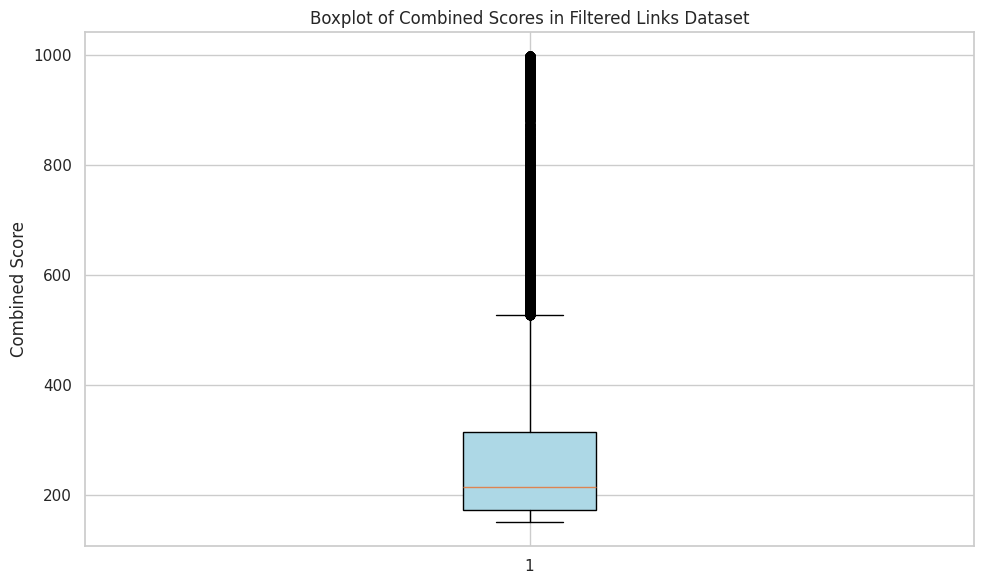

,Statistic,Value
0,Min,150.000000
1,25th Percentile (Q1),172.000000
2,Median,214.000000
3,Mean,281.074969
4,75th Percentile (Q3),314.000000
5,Max,999.000000
6,IQR (Interquartile Range),142.000000
7,Standard Deviation,170.198475


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Create the boxplot
box = plt.boxplot(filtered_links['combined_score'], patch_artist=True)
plt.ylabel('Combined Score')
plt.title('Boxplot of Combined Scores in Filtered Links Dataset')

# Color the boxes
for patch in box['boxes']:
    patch.set_facecolor('lightblue')

plt.tight_layout()
plt.show()

# Display statistical details of the boxplot
stats = {
    'Min': filtered_links['combined_score'].min(),
    '25th Percentile (Q1)': filtered_links['combined_score'].quantile(0.25),
    'Median': filtered_links['combined_score'].median(),
    'Mean': filtered_links['combined_score'].mean(),
    '75th Percentile (Q3)': filtered_links['combined_score'].quantile(0.75),
    'Max': filtered_links['combined_score'].max(),
    'IQR (Interquartile Range)': filtered_links['combined_score'].quantile(0.75) - filtered_links['combined_score'].quantile(0.25),
    'Standard Deviation': filtered_links['combined_score'].std(),
}

# Create a DataFrame to display the statistics nicely
stats_df = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])
display(stats_df)

In [18]:
display(filtered_links.sort_values(by='combined_score', ascending=False).head())

,protein1,p1_Uniprot,protein2,p2_Uniprot,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
7912363,9606.ENSP00000360532,Q99459,9606.ENSP00000355050,Q8WYA6,0,0,0,0,0,255,88,971,46,900,0,962,131,999
5335474,9606.ENSP00000326366,P49768,9606.ENSP00000495360,P35222,0,0,0,0,0,64,0,820,95,900,0,957,0,999
13383313,9606.ENSP00000495360,P35222,9606.ENSP00000265165,Q9UJU2,0,0,0,0,0,0,0,993,511,900,0,999,205,999
928723,9606.ENSP00000234739,O00512,9606.ENSP00000495360,P35222,0,0,0,0,0,0,0,979,0,900,0,996,46,999
1593651,9606.ENSP00000257430,P25054,9606.ENSP00000324806,P49841,0,0,0,0,0,95,0,829,234,900,0,996,181,999
